In [16]:
df.columns = ['Varience','skewness','curtosis','entropy','class']
df.head()

,Varience,skewness,curtosis,entropy,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [15]:
import os
import pandas as pd

path = ('/Users/mohdsafeenkhan/Desktop/Machine Learning/Project/Banknote_Authentication/data/')
data_file = os.path.join(path,'data_banknote_authentication.txt')
df = pd.read_csv(data_file)
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [17]:
from sklearn.model_selection import train_test_split

train_val,test = train_test_split(df,test_size=0.2 ,random_state= 42)
train , val = train_test_split(train_val , test_size=0.25,random_state=42)

x_train = train.drop('class' , axis= 1)
y_train = train['class']

x_val = val.drop('class' , axis= 1)
y_val = val['class']

x_test = test.drop('class' , axis= 1)
y_test = test['class']

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report , confusion_matrix
KNN = KNeighborsClassifier(n_neighbors=10)

KNN.fit(x_train,y_train)
y_hat = KNN.predict(x_val)
print(classification_report(y_val,y_hat))
print(confusion_matrix(y_val,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       115

    accuracy                           1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274

[[159   0]
 [  0 115]]


In [21]:
from sklearn.model_selection import RandomizedSearchCV

param = {"n_neighbors":[2,5,10,20,35,50]}
model = KNeighborsClassifier()
randomSearch = RandomizedSearchCV(estimator=model,param_distributions=param,n_iter=15,cv=5,n_jobs=-1)
randomSearch.fit(x_train,y_train)
print(f"Best Param is {randomSearch.best_params_}")

/Users/mohdsafeenkhan/Desktop/Machine Learning/Project/venv/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=15. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Param is {'n_neighbors': 2}


<Axes: >

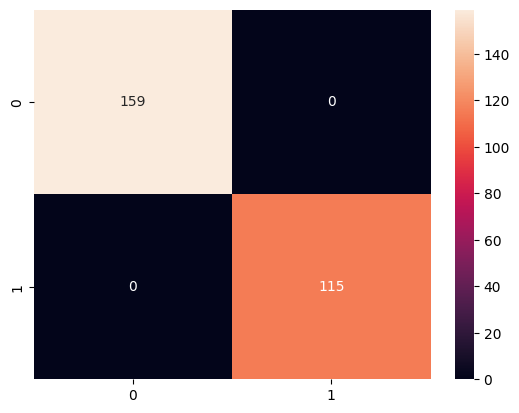

In [22]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_val,y_hat), annot=True, fmt='d')
